### Домашнее задание № 10
### Козел А.Г.  23.10.2022   v.1 
Подготовить данные для этапа моделирования (обучения)
    
1. Анализ данных, необходимые корректировки. 
2. Обработать пропуски. 
3. Оценить выбросы. 
4. Корреляция. 
5. Тест на нормальность распределения.
6. Масштабировать и стандартизировать данные.
7. Разделите данные на тренрровачную и тестовую выборку.
8. При обработке пропусков/выбросов/скалировании тестовую и тренировачную выборку обрабатывать отдельно.

In [1]:
#импортируем требуемые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler as MMScaler

In [2]:
data = pd.read_csv('credit_train.csv',sep=';')
data

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.60,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.10,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.10,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.10,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.10,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,F,27.0,UNM,SPC,"64867,00",12,1.10,"0,535257",GRD,РЕСПУБЛИКА ТАТАРСТАН,40000.0,6.0,0.0,0
170742,170743,F,24.0,MAR,SPC,"17640,00",6,1.60,"0,573287",SCH,САНКТ-ПЕТЕРБУРГ Г,30000.0,1.0,0.0,0
170743,170744,F,31.0,UNM,SPC,"27556,47",10,1.32,"0,416098",GRD,ПРИМОРСКИЙ КРАЙ,40000.0,1.0,0.0,0
170744,170745,F,53.0,DIV,PNA,"6189,00",12,1.10,"0,482595",SCH,ПЕНЗЕНСКАЯ ОБЛ,31000.0,2.0,0.0,0


### 1. Анализ данных, необходимые корректировки.

#### Мы располагаем следующей информацией из анкетных данных заемщиков:
#### Категориальные 
* client_id - идентификатор клиента,
* education - уровень образования,
* marital_status - семейное положение,
* gender - пол заемщика,
* tariff_id	- номер предлагаемого тарифа,
* job_position - работа,
* living_region - регион проживания.
#### Вещественные:
* age - возраст заемщика,
* credit_sum - сумма кредита,
* credit_month - срок кредитования,
* monthly_income - заработок в месяц,
* credit_count - количество кредитов у клиента,
* overdue_credit_count - количество просроченых кредитов клиента,
* open_account_flg - флаг открытия счета.


* score_shk	- не описана организаторами, предположительно оценка кредитного скоринга

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170743 non-null  float64
 3   marital_status        170743 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170744 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170739 non-null  object 
 9   education             170741 non-null  object 
 10  living_region         170554 non-null  object 
 11  monthly_income        170741 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

In [4]:
# преобразуем тип переменных
for i in ['credit_sum', 'score_shk']:
    data[i] = data[i].str.replace(',', '.').astype('float')

In [5]:
#убираю столбец "client_id "
df = pd.DataFrame(data,columns=['gender', 'age', 'marital_status', 'job_position', 'credit_sum', 'credit_month', 'tariff_id',
                                'score_shk', 'education', 'living_region', 'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg'])
df

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,59998.00,10,1.60,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,10889.00,6,1.10,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,10728.00,12,1.10,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,12009.09,12,1.10,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.10,0.421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,F,27.0,UNM,SPC,64867.00,12,1.10,0.535257,GRD,РЕСПУБЛИКА ТАТАРСТАН,40000.0,6.0,0.0,0
170742,F,24.0,MAR,SPC,17640.00,6,1.60,0.573287,SCH,САНКТ-ПЕТЕРБУРГ Г,30000.0,1.0,0.0,0
170743,F,31.0,UNM,SPC,27556.47,10,1.32,0.416098,GRD,ПРИМОРСКИЙ КРАЙ,40000.0,1.0,0.0,0
170744,F,53.0,DIV,PNA,6189.00,12,1.10,0.482595,SCH,ПЕНЗЕНСКАЯ ОБЛ,31000.0,2.0,0.0,0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,170743.0,36.497262,10.546044,18.0,28.000000,34.000000,43.000000,71.000000
credit_sum,170744.0,26095.097541,16234.874095,2736.0,14908.000000,21229.000000,32068.000000,200000.000000
credit_month,170746.0,10.980749,3.536698,3.0,10.000000,10.000000,12.000000,36.000000
tariff_id,170746.0,1.323900,0.235813,1.0,1.100000,1.320000,1.600000,1.960000
score_shk,170739.0,0.469473,0.124265,0.0,0.379522,0.461599,0.552412,1.128291
monthly_income,170741.0,40138.596149,25044.373992,5000.0,25000.000000,35000.000000,50000.000000,950000.000000
credit_count,161516.0,2.107308,1.777128,0.0,1.000000,2.000000,3.000000,21.000000
overdue_credit_count,161516.0,0.046070,0.211548,0.0,0.000000,0.000000,0.000000,3.000000
open_account_flg,170746.0,0.176028,0.380845,0.0,0.000000,0.000000,0.000000,1.000000


In [7]:
# количество уникальных значений
df.nunique()

gender                      2
age                        54
marital_status              5
job_position               18
credit_sum              42769
credit_month               31
tariff_id                  32
score_shk               16279
education                   5
living_region             301
monthly_income           1591
credit_count               21
overdue_credit_count        4
open_account_flg            2
dtype: int64

### 2. Обработка пропусков

#### Разобьём на тренировочную и тестовую выборку



In [8]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=42)

In [9]:
dm = df_train.dropna()
dm

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
82591,F,40.0,DIV,SPC,59679.0,10,1.60,0.480979,UGR,ОБЛ МОСКОВСКАЯ,70000.0,0.0,0.0,0
35335,F,26.0,MAR,SPC,43868.0,10,1.60,0.675330,GRD,УЛЬЯНОВСКАЯ ОБЛ,34700.0,2.0,0.0,0
19373,M,29.0,MAR,SPC,19159.0,12,1.10,0.411329,GRD,ТВЕРСКАЯ ОБЛ,32000.0,1.0,0.0,0
102225,M,45.0,MAR,SPC,9926.0,12,1.44,0.365966,UGR,ОБЛ КИРОВСКАЯ,33000.0,3.0,0.0,0
128385,M,39.0,UNM,SPC,39289.0,10,1.10,0.435281,GRD,САНКТ-ПЕТЕРБУРГ,53000.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,M,29.0,MAR,SPC,29678.0,10,1.60,0.721156,GRD,ОМСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0
103694,M,29.0,MAR,SPC,23068.0,15,1.10,0.566393,GRD,ТЮМЕНСКАЯ ОБЛ,30000.0,3.0,0.0,1
131932,F,45.0,MAR,UMN,16418.0,10,1.10,0.327380,SCH,ОБЛ БРЯНСКАЯ,30400.0,1.0,0.0,0
146867,F,49.0,MAR,SPC,12169.0,10,1.40,0.467395,SCH,ТАМБОВСКАЯ ОБЛ,16000.0,1.0,0.0,0


### Образование

In [10]:
set(dm['education'])

{'ACD', 'GRD', 'PGR', 'SCH', 'UGR'}

#### Предположим, что следующая расшифровк верна
* ACD academic degree - ученая степень 
* GRD  graduate - выпускник
* PGR - postgraduate education - послевузовское образование (аспирант) 
* SCH -school education - школьное образование 
* UGR - undergraduates, старшекурсники


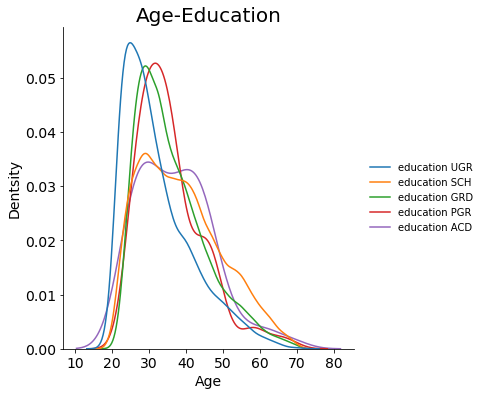

In [11]:
sns.displot(
    {
        "education UGR": dm[dm.education == 'UGR'].age,
        "education SCH": dm[dm.education == 'SCH'].age,
        "education GRD": dm[dm.education == 'GRD'].age,
        "education PGR": dm[dm.education == 'PGR'].age,
        "education ACD": dm[dm.education == 'ACD'].age,
    },
    kind="kde",
    common_norm=False
)

plt.title('Age-Education', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [12]:
set(dm['overdue_credit_count'])

{0.0, 1.0, 2.0, 3.0}

#### Оценка выбросов

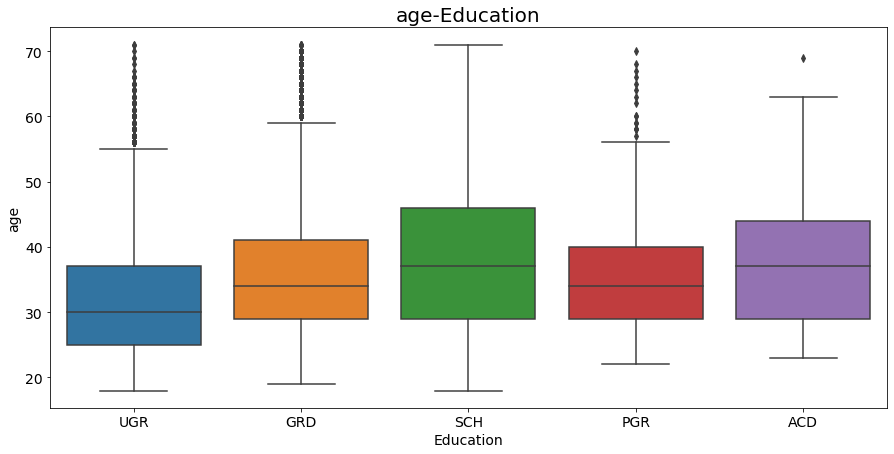

In [13]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='education', y='age', data=dm)

plt.title('age-Education', fontsize=20)
plt.ylabel('age', fontsize=14)
plt.xlabel('Education', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [15]:
dm.groupby('education')['age'].median()

education
ACD    37.0
GRD    34.0
PGR    34.0
SCH    37.0
UGR    30.0
Name: age, dtype: float64

In [16]:
dm.groupby('education').count()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
education,,,,,,,,,,,,,
ACD,78,78,78,78,78,78,78,78,78,78,78,78,78
GRD,48456,48456,48456,48456,48456,48456,48456,48456,48456,48456,48456,48456,48456
PGR,389,389,389,389,389,389,389,389,389,389,389,389,389
SCH,57831,57831,57831,57831,57831,57831,57831,57831,57831,57831,57831,57831,57831
UGR,6185,6185,6185,6185,6185,6185,6185,6185,6185,6185,6185,6185,6185


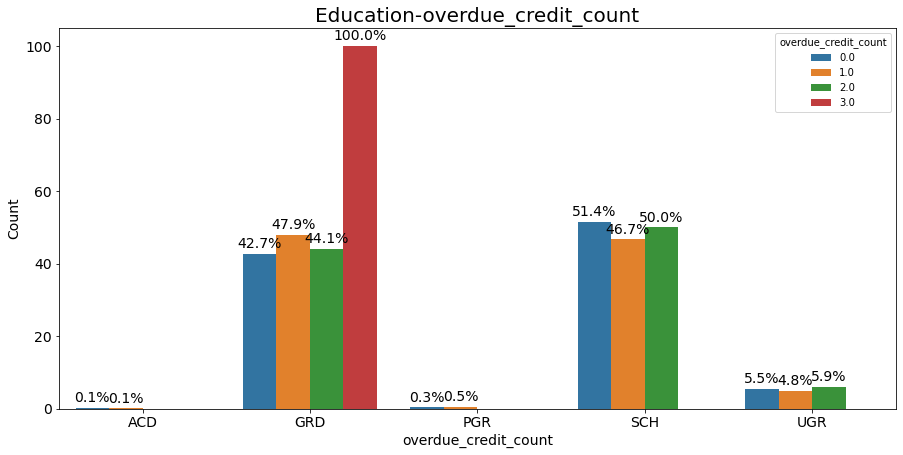

In [17]:
plt.figure(figsize=(15, 7))

educ_def = (df_train.groupby(['overdue_credit_count'])['education']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('education'))

ax = sns.barplot(x="education", y="percentage", hue="overdue_credit_count", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('Education-overdue_credit_count', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('overdue_credit_count', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Процент недобросовестных заёмщиков выше у категории GRD graduate - выпускник.


### Семейное положение

In [18]:
set(dm['marital_status'])

{'CIV', 'DIV', 'MAR', 'UNM', 'WID'}

* UNM : Холост/не замужем 
* DIV : Резведен (а) 
* MAR : Женат/замужем 
* WID : Вдовец, вдова 
* CIV : Гражданский брак

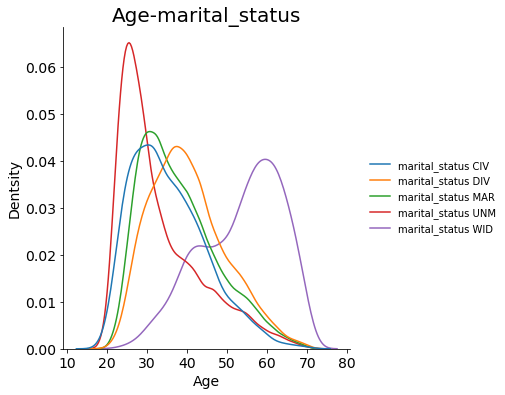

In [19]:
sns.displot(
    {
        "marital_status CIV": dm[dm.marital_status == 'CIV'].age,
        "marital_status DIV": dm[dm.marital_status == 'DIV'].age,
        "marital_status MAR": dm[dm.marital_status == 'MAR'].age,
        "marital_status UNM": dm[dm.marital_status == 'UNM'].age,
        "marital_status WID": dm[dm.marital_status == 'WID'].age,
    },
    kind="kde",
    common_norm=False
)

plt.title('Age-marital_status', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

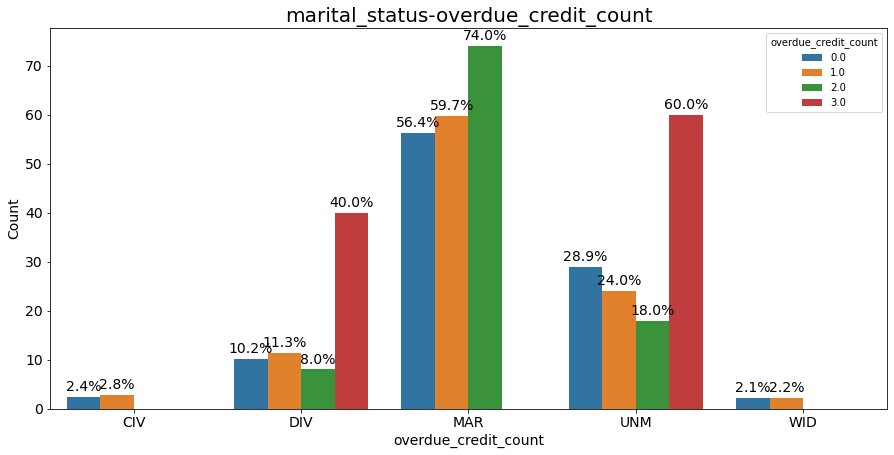

In [20]:
plt.figure(figsize=(15, 7))

educ_def = (df.groupby(['overdue_credit_count'])['marital_status']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('marital_status'))

ax = sns.barplot(x="marital_status", y="percentage", hue="overdue_credit_count", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('marital_status-overdue_credit_count', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('overdue_credit_count', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [21]:
df.groupby('marital_status')['age'].median()

marital_status
CIV    33.0
DIV    39.0
MAR    36.0
UNM    29.0
WID    55.0
Name: age, dtype: float64

Процент недобросовестных заёмщиков выше у категорий UNM : Холост/не замужем и DIV : Резведен (а). Более стабильные в плане выплат MAR : Женат/замужем, WID : Вдовец, вдова, CIV : Гражданский брак


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'credit_sum'}>,
        <AxesSubplot:title={'center':'credit_month'}>],
       [<AxesSubplot:title={'center':'tariff_id'}>,
        <AxesSubplot:title={'center':'score_shk'}>,
        <AxesSubplot:title={'center':'monthly_income'}>],
       [<AxesSubplot:title={'center':'credit_count'}>,
        <AxesSubplot:title={'center':'overdue_credit_count'}>,
        <AxesSubplot:title={'center':'open_account_flg'}>]], dtype=object)

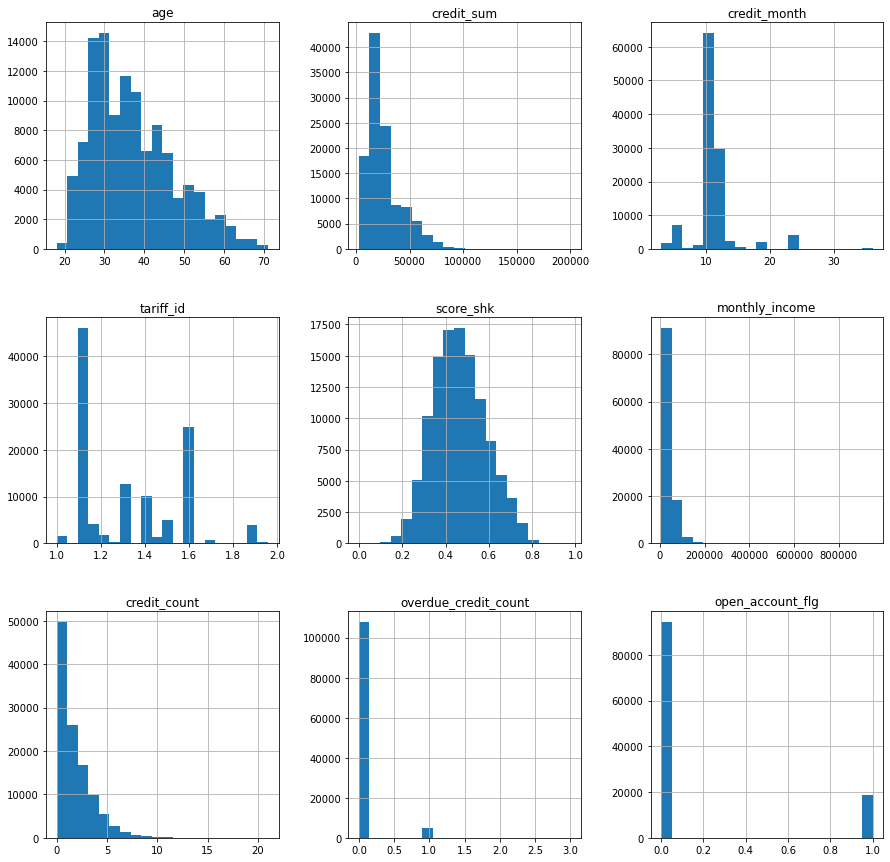

In [22]:
dm.hist(bins = 20, figsize = (15, 15))


C:\Users\37533\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\37533\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\37533\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

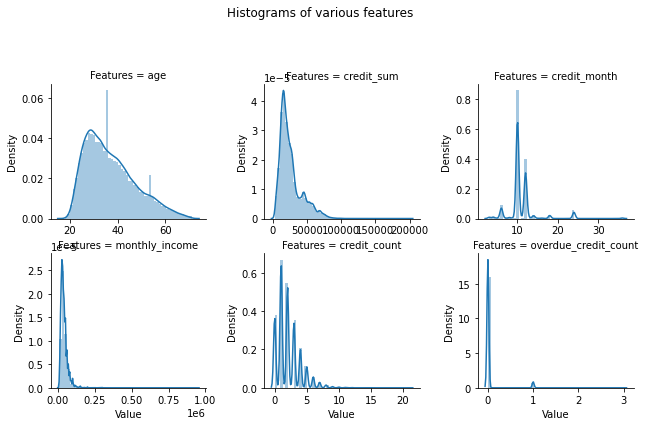

In [23]:
df_1 = pd.DataFrame(dm,columns=['age', 'credit_sum', 'credit_month', 'monthly_income',
       'credit_count', 'overdue_credit_count'])

numeric_features = df_1
numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.8)
plt.suptitle("Histograms of various features");

### Применяем функцию нормализации, убирая длинные хвосты

C:\Users\37533\AppData\Local\Temp\ipykernel_6872\1539853022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm.credit_sum = dm.credit_sum.transform(np.log)


<AxesSubplot:ylabel='Frequency'>

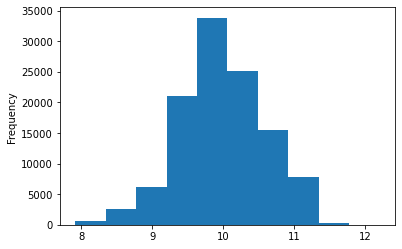

In [24]:
dm.credit_sum = dm.credit_sum.transform(np.log)
dm.credit_sum.plot(kind='hist')

C:\Users\37533\AppData\Local\Temp\ipykernel_6872\2250071471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm.monthly_income = dm.monthly_income.transform(np.log)


<AxesSubplot:ylabel='Frequency'>

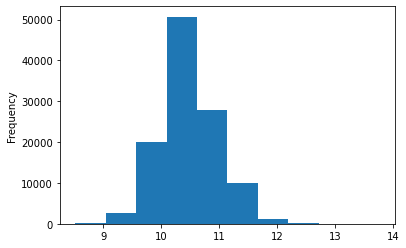

In [25]:
dm.monthly_income = dm.monthly_income.transform(np.log)
dm.monthly_income.plot(kind='hist')

### Корреляция

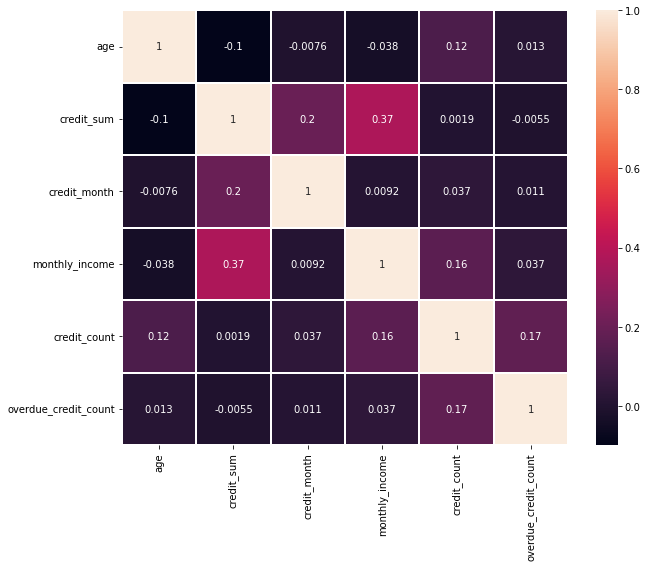

In [26]:
num_cols = ['age', 'credit_sum', 'credit_month', 'monthly_income',
       'credit_count', 'overdue_credit_count']

plt.figure(figsize=(10, 8))

sns.heatmap(dm[num_cols].corr(method='spearman'),annot=True, linewidths=2);

In [31]:
df_1 = pd.DataFrame(dm,columns=['age', 'credit_sum', 'credit_month', 'monthly_income',
       'credit_count', 'overdue_credit_count'])
mm_scaler = MMScaler(feature_range=(-1, 1))
df_new = mm_scaler.fit_transform(df_1)
df_new = pd.DataFrame(df_new, columns=df_1.columns)
df_new


,age,credit_sum,credit_month,monthly_income,credit_count,overdue_credit_count
0,-0.169811,0.436446,-0.575758,0.005925,-1.000000,-1.0
1,-0.698113,0.293012,-0.575758,-0.261562,-0.809524,-1.0
2,-0.584906,-0.093030,-0.454545,-0.292438,-0.904762,-1.0
3,0.018868,-0.399481,-0.454545,-0.280709,-0.714286,-1.0
4,-0.207547,0.241640,-0.575758,-0.100117,-0.714286,-1.0
...,...,...,...,...,...,...
112934,-0.584906,0.110908,-0.575758,-0.386533,-0.904762,-1.0
112935,-0.584906,-0.006506,-0.272727,-0.317038,-0.714286,-1.0
112936,0.018868,-0.164978,-0.575758,-0.311989,-0.904762,-1.0
112937,0.169811,-0.304540,-0.575758,-0.556644,-0.904762,-1.0


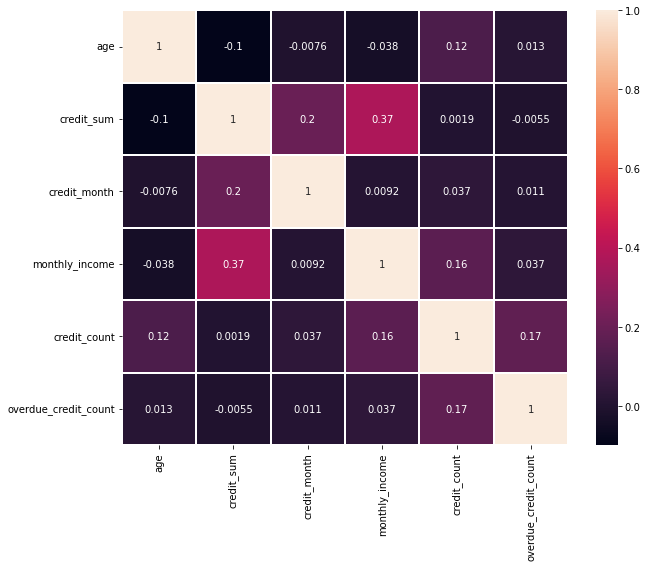

In [32]:
plt.figure(figsize=(10, 8))

sns.heatmap(df_new.corr(method='spearman'), annot=True, linewidths=2);


### Тест на нормальность

In [29]:
from scipy.stats import shapiro, normaltest

In [33]:
def print_is_shapiro(data_set, column):
    stat, p = shapiro(data_set[column])
    print('Данные теста Шапиро-Уилка:')
    print('Статистика = %.3f, p = %.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print(f"{column}: Распределение нормальное")
    else:
        print(f"{column}: Распределение не соответствует нормальному")

for column in df_new:
    print_is_shapiro(df_new, column)



Данные теста Шапиро-Уилка:
Статистика = 0.949, p = 0.000
age: Распределение не соответствует нормальному
Данные теста Шапиро-Уилка:
Статистика = 0.993, p = 0.000
credit_sum: Распределение не соответствует нормальному
Данные теста Шапиро-Уилка:
Статистика = 0.643, p = 0.000
credit_month: Распределение не соответствует нормальному
Данные теста Шапиро-Уилка:
Статистика = 0.992, p = 0.000
monthly_income: Распределение не соответствует нормальному
Данные теста Шапиро-Уилка:
Статистика = 0.878, p = 0.000
credit_count: Распределение не соответствует нормальному
Данные теста Шапиро-Уилка:
Статистика = 0.211, p = 0.000
overdue_credit_count: Распределение не соответствует нормальному


C:\Users\37533\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
